# **Explorando y analisando los datos para su debida limpieza**

# Elementos

Los parámetros que  StudentGuard evalúa para determinar el riesgo de un estudiante son:

● Promedio actual del estudiante (promedio_actual).

● Porcentaje de asistencia a clases (asistencia_clases).

● Porcentaje de tareas entregadas (tareas_entregadas).

● Participación en clase (participacion_clase).

● Horas dedicadas al estudio (horas_estudio).

● Promedio en evaluaciones parciales (promedio_evaluaciones).

● Cantidad de cursos reprobados o retirados (cursos_reprobados).

● Participación en actividades extracurriculares (actividades_extracurriculares).

● Cantidad de reportes disciplinarios (reportes_disciplinarios).

● Riesgo (riesgo)


In [ ]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
# Leer el archivo
uploaded = files.upload()  # Abre el explorador de archivos

# Cargar el primer archivo seleccionado
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)


Saving studentguard_data_prueba (1).csv to studentguard_data_prueba (1).csv


## Vistazo al Dataset

In [ ]:
print(data.shape)
print('-'*25)
data.head()

(200, 14)
-------------------------


,asistencia_clases,tareas_entregadas,participacion_clase,horas_estudio,promedio_evaluaciones,cursos_reprobados,actividades_extracurriculares,reportes_disciplinarios,riesgo,carnet,first_name,last_name,promedio_actual,gender
0,92.0,18,85.0,15.0,88.0,0,"['deportes', 'club_matematicas']",0,no riesgo,88-483-1466,Kearney,Gainsbury,15.9623,Male
1,75.0,12,60.0,8.0,65.0,2,['club_lectura'],1,riesgo,15-612-7538,Currey,Chilton,52.6045,Male
2,95.0,19,90.0,20.0,92.0,0,"['deportes', 'teatro', 'musica']",0,no riesgo,81-273-4338,Kelcie,Vayne,58.7542,Non-binary
3,88.0,17,78.0,12.0,82.0,0,['voluntariado'],0,no riesgo,53-300-8548,Herrick,Romanetti,NaN,Male
4,70.0,15,65.0,10.0,72.0,1,[],2,riesgo,35-596-6889,Cherie,Dober,97.6683,Female


Necesitamos 10 parametros y hay 14 parametros.
Los parametros extras son los siguientes:
** carnet,
first_name,
last_name,
gender. **

In [ ]:
# Identificación de las variables categóricas y numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   asistencia_clases              200 non-null    float64
 1   tareas_entregadas              200 non-null    int64  
 2   participacion_clase            200 non-null    float64
 3   horas_estudio                  200 non-null    float64
 4   promedio_evaluaciones          200 non-null    float64
 5   cursos_reprobados              200 non-null    int64  
 6   actividades_extracurriculares  200 non-null    object 
 7   reportes_disciplinarios        200 non-null    int64  
 8   riesgo                         200 non-null    object 
 9   carnet                         175 non-null    object 
 10  first_name                     200 non-null    object 
 11  last_name                      200 non-null    object 
 12  promedio_actual                174 non-null    flo

In [ ]:
# Verificación de tipos
print(data.dtypes)

asistencia_clases                float64
tareas_entregadas                  int64
participacion_clase              float64
horas_estudio                    float64
promedio_evaluaciones            float64
cursos_reprobados                  int64
actividades_extracurriculares     object
reportes_disciplinarios            int64
riesgo                            object
carnet                            object
first_name                        object
last_name                         object
promedio_actual                  float64
gender                            object
dtype: object


## **Limpieza y homolgacion de los datos.**

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

Conversión de tipos de datos

1.   Datos faltantes en algunas celdas
2.   Datos faltantes en algunas celdas
3. Columnas irrelevantes (que no responden al problema que queremos resolver)
4. Columnas irrelevantes (que no responden al problema que queremos resolver)
5. Registros (filas) repetidos
6. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
7. Errores tipográficos en el caso de las variables categóricas.

Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis Exploratorio.

# Primero borraremos columnas irrelevantes

In [ ]:
data = data.drop(columns=["carnet", "first_name", "last_name", "gender"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   asistencia_clases              200 non-null    float64
 1   tareas_entregadas              200 non-null    int64  
 2   participacion_clase            200 non-null    float64
 3   horas_estudio                  200 non-null    float64
 4   promedio_evaluaciones          200 non-null    float64
 5   cursos_reprobados              200 non-null    int64  
 6   actividades_extracurriculares  200 non-null    object 
 7   reportes_disciplinarios        200 non-null    int64  
 8   riesgo                         200 non-null    object 
 9   promedio_actual                174 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 15.8+ KB


*Los tipos de datos estan correctos, pero no todos los datas vienen asi, entonces se debe tomar en cuenta que para la limpieza de otro csv, se deben convertir los datos a los que estan actualmente.*
1. 0   asistencia_clases              200 non-null    float64
 2. 1   tareas_entregadas              200 non-null    int64  
 3. 2   participacion_clase            200 non-null    float64
 4. 3   horas_estudio                  200 non-null    float64
 5. 4   promedio_evaluaciones          200 non-null    float64
 6. 5   cursos_reprobados              200 non-null    int64  
7.  6   actividades_extracurriculares  200 non-null    object
 8. 7   reportes_disciplinarios        200 non-null    int64  
 9. 8   riesgo                         200 non-null    object
 10. 9   promedio_actual                174 non-null    float64


## Identificacion y eliminacion de datos duplicados

En este csv no vienen datos duplicados, pero en el codigo a implementar se debe verificar eso.

## Datos Faltantes

Algunas columnas pueden contener valores faltantes representados como Noneceldas vacías.
Para gestionar valores faltantes:

1. Completaremos los valores numéricos faltantes con la mediana o la media.
2. Reemplazaremos los valores categóricos faltantes con o "UNKNOWNK".

# Datos faltantes en variables numéricas

In [ ]:
# Ver datos estadísticos
data.describe()


,asistencia_clases,tareas_entregadas,participacion_clase,horas_estudio,promedio_evaluaciones,cursos_reprobados,reportes_disciplinarios,promedio_actual
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,174.000000
mean,80.350000,14.955000,75.075000,14.460000,77.460000,1.060000,0.725000,58.844002
std,13.605996,3.728604,17.509491,7.051027,15.265108,1.154584,1.074779,33.961531
min,35.000000,3.000000,15.000000,1.000000,25.000000,0.000000,0.000000,0.034500
25%,72.000000,12.000000,64.750000,9.000000,66.000000,0.000000,0.000000,30.687875
50%,83.000000,15.000000,79.000000,14.000000,80.000000,1.000000,0.000000,55.714650
75%,91.250000,18.000000,89.000000,19.250000,90.000000,2.000000,1.000000,89.488050
max,99.000000,20.000000,100.000000,32.000000,99.000000,5.000000,5.000000,119.498200


**El promedio tiene valores nulos, entonces lo que se hara es rellenar con: Rellenar con la media o mediana**

In [ ]:
# Rellenar los valores numéricos que faltan con la media.
data["promedio_actual"] = data["promedio_actual"].fillna(data["promedio_actual"].median())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   asistencia_clases              200 non-null    float64
 1   tareas_entregadas              200 non-null    int64  
 2   participacion_clase            200 non-null    float64
 3   horas_estudio                  200 non-null    float64
 4   promedio_evaluaciones          200 non-null    float64
 5   cursos_reprobados              200 non-null    int64  
 6   actividades_extracurriculares  200 non-null    object 
 7   reportes_disciplinarios        200 non-null    int64  
 8   riesgo                         200 non-null    object 
 9   promedio_actual                200 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 15.8+ KB


In [ ]:
# Ver datos estadísticos
data.describe()

,asistencia_clases,tareas_entregadas,participacion_clase,horas_estudio,promedio_evaluaciones,cursos_reprobados,reportes_disciplinarios,promedio_actual
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,80.350000,14.955000,75.075000,14.460000,77.460000,1.060000,0.725000,58.437187
std,13.605996,3.728604,17.509491,7.051027,15.265108,1.154584,1.074779,31.682884
min,35.000000,3.000000,15.000000,1.000000,25.000000,0.000000,0.000000,0.034500
25%,72.000000,12.000000,64.750000,9.000000,66.000000,0.000000,0.000000,34.110850
50%,83.000000,15.000000,79.000000,14.000000,80.000000,1.000000,0.000000,55.714650
75%,91.250000,18.000000,89.000000,19.250000,90.000000,2.000000,1.000000,84.254875
max,99.000000,20.000000,100.000000,32.000000,99.000000,5.000000,5.000000,119.498200


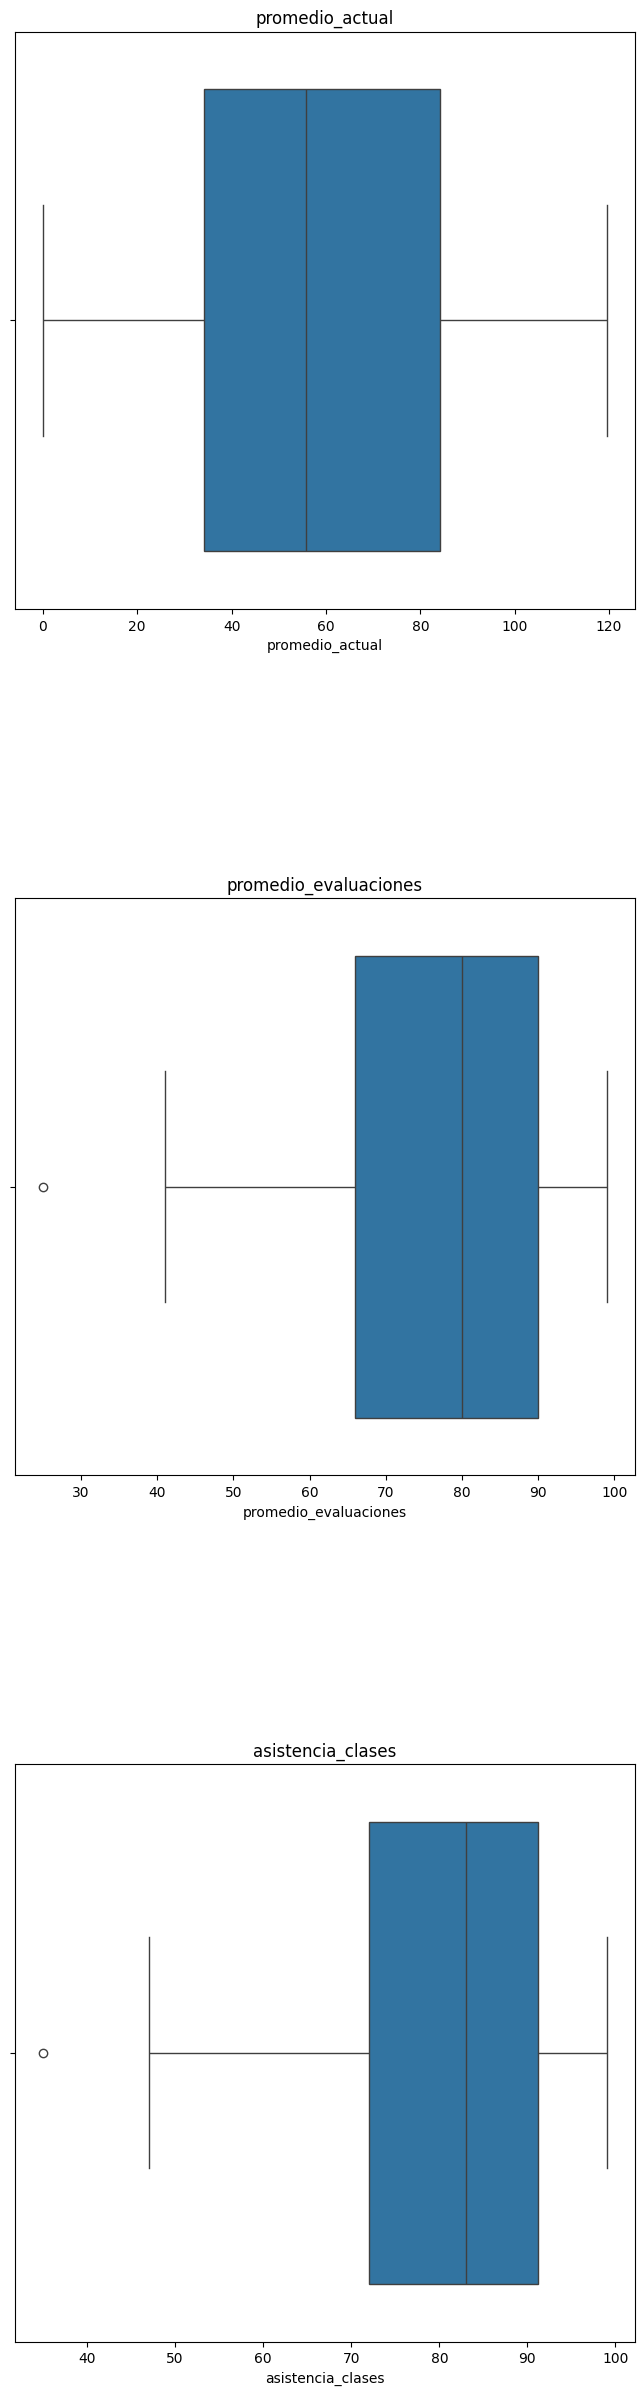

In [ ]:
# Validar outliers en las variables numéricas
# Generar gráficas individuales pues las variables numéricas están en rangos diferentes
cols_num = ['promedio_actual', 'promedio_evaluaciones', 'asistencia_clases']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)

## Columnas que requieren encoding

actividades_extracurriculares
riesgo

In [ ]:
# Encoding actividades_extracurriculares
# Convertir la lista de actividades a un valor binario: 1 si participa (lista no vacía), 0 si no (lista vacía).
data["actividades_extracurriculares"] = data["actividades_extracurriculares"].apply(lambda x: 1 if bool(x) else 0)

In [ ]:
print(data.shape)
print('-'*25)
data.head()

(200, 10)
-------------------------


,asistencia_clases,tareas_entregadas,participacion_clase,horas_estudio,promedio_evaluaciones,cursos_reprobados,actividades_extracurriculares,reportes_disciplinarios,riesgo,promedio_actual
0,92.0,18,85.0,15.0,88.0,0,1,0,no riesgo,15.96230
1,75.0,12,60.0,8.0,65.0,2,1,1,riesgo,52.60450
2,95.0,19,90.0,20.0,92.0,0,1,0,no riesgo,58.75420
3,88.0,17,78.0,12.0,82.0,0,1,0,no riesgo,55.71465
4,70.0,15,65.0,10.0,72.0,1,0,2,riesgo,97.66830


In [ ]:
#Encoding riesgo
data['riesgo'] = data['riesgo'].map({'no riesgo': 0, 'riesgo': 1})

In [ ]:
print(data.shape)
print('-'*25)
data.head()

(200, 10)
-------------------------


,asistencia_clases,tareas_entregadas,participacion_clase,horas_estudio,promedio_evaluaciones,cursos_reprobados,actividades_extracurriculares,reportes_disciplinarios,riesgo,promedio_actual
0,92.0,18,85.0,15.0,88.0,0,1,0,0,15.96230
1,75.0,12,60.0,8.0,65.0,2,1,1,1,52.60450
2,95.0,19,90.0,20.0,92.0,0,1,0,0,58.75420
3,88.0,17,78.0,12.0,82.0,0,1,0,0,55.71465
4,70.0,15,65.0,10.0,72.0,1,0,2,1,97.66830
